### Problem Statement

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
+ Which variables are significant in predicting the demand for shared bikes.
+ How well those variables describe the bike demands

### Dataset Information

	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

### Importing the dataset

In [2]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Basic Information

In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
bike_dup = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset = None, inplace = True)

In [7]:
bike_dup.shape

(730, 16)

In [8]:
bike.shape

(730, 16)

### Dropping Columns
1. instant
- We don't need instant columns as it only indicates the row number.
2. dteday
- We also don't need this dteday as we already have the necessary information about this column in Year and Month column.
3. atemp
- temp and atemp both are almost same and they are highly corelated each other
4. casual & registered
- casual and registered are just sum of cnt

In [9]:
bike = bike.drop(columns =['instant', 'dteday', 'atemp', 'casual', 'registered'])

In [10]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


### Renaming Columns

In [11]:
bike = bike.rename(columns={'yr':'Year', 'mnth':'Month', 'weathersit':'Weather', 'temp':'Temperature',
                        'hum':'Humidity', 'cnt':'Count'})
bike.columns = [bike_name.capitalize() for bike_name in bike.columns]

bike.head()

,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Humidity,Windspeed,Count
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [12]:
bike.shape

(730, 11)

### Finding Categorical Variables

In [13]:
bike.Season.value_counts()

3    188
2    184
1    180
4    178
Name: Season, dtype: int64

In [14]:
bike.Year.value_counts()

0    365
1    365
Name: Year, dtype: int64

In [15]:
bike.Month.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: Month, dtype: int64

In [16]:
bike.Holiday.value_counts()

0    709
1     21
Name: Holiday, dtype: int64

In [17]:
bike.Weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: Weekday, dtype: int64

In [18]:
bike.Workingday.value_counts()

1    499
0    231
Name: Workingday, dtype: int64

In [19]:
bike.Weather.value_counts()

1    463
2    246
3     21
Name: Weather, dtype: int64

### Creating dummy variables for required categorical variables

In [20]:
bike['Season'] = bike['Season'].astype('category')
bike['Weekday'] = bike['Weekday'].astype('category')
bike['Month'] = bike['Month'].astype('category')
bike['Weather'] = bike['Weather'].astype('category')

In [21]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Season       730 non-null    category
 1   Year         730 non-null    int64   
 2   Month        730 non-null    category
 3   Holiday      730 non-null    int64   
 4   Weekday      730 non-null    category
 5   Workingday   730 non-null    int64   
 6   Weather      730 non-null    category
 7   Temperature  730 non-null    float64 
 8   Humidity     730 non-null    float64 
 9   Windspeed    730 non-null    float64 
 10  Count        730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [22]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike = pd.get_dummies(bike, drop_first = True)

bike.head()

,Year,Holiday,Workingday,Temperature,Humidity,Windspeed,Count,Season_2,Season_3,Season_4,...,Month_11,Month_12,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Weather_2,Weather_3
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         730 non-null    int64  
 1   Holiday      730 non-null    int64  
 2   Workingday   730 non-null    int64  
 3   Temperature  730 non-null    float64
 4   Humidity     730 non-null    float64
 5   Windspeed    730 non-null    float64
 6   Count        730 non-null    int64  
 7   Season_2     730 non-null    uint8  
 8   Season_3     730 non-null    uint8  
 9   Season_4     730 non-null    uint8  
 10  Month_2      730 non-null    uint8  
 11  Month_3      730 non-null    uint8  
 12  Month_4      730 non-null    uint8  
 13  Month_5      730 non-null    uint8  
 14  Month_6      730 non-null    uint8  
 15  Month_7      730 non-null    uint8  
 16  Month_8      730 non-null    uint8  
 17  Month_9      730 non-null    uint8  
 18  Month_10     730 non-null    uint8  
 19  Month_11

In [24]:
bike.shape

(730, 29)

### Spilting the data

In [25]:
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         510 non-null    int64  
 1   Holiday      510 non-null    int64  
 2   Workingday   510 non-null    int64  
 3   Temperature  510 non-null    float64
 4   Humidity     510 non-null    float64
 5   Windspeed    510 non-null    float64
 6   Count        510 non-null    int64  
 7   Season_2     510 non-null    uint8  
 8   Season_3     510 non-null    uint8  
 9   Season_4     510 non-null    uint8  
 10  Month_2      510 non-null    uint8  
 11  Month_3      510 non-null    uint8  
 12  Month_4      510 non-null    uint8  
 13  Month_5      510 non-null    uint8  
 14  Month_6      510 non-null    uint8  
 15  Month_7      510 non-null    uint8  
 16  Month_8      510 non-null    uint8  
 17  Month_9      510 non-null    uint8  
 18  Month_10     510 non-null    uint8  
 19  Month_

In [27]:
df_train.shape

(510, 29)

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         220 non-null    int64  
 1   Holiday      220 non-null    int64  
 2   Workingday   220 non-null    int64  
 3   Temperature  220 non-null    float64
 4   Humidity     220 non-null    float64
 5   Windspeed    220 non-null    float64
 6   Count        220 non-null    int64  
 7   Season_2     220 non-null    uint8  
 8   Season_3     220 non-null    uint8  
 9   Season_4     220 non-null    uint8  
 10  Month_2      220 non-null    uint8  
 11  Month_3      220 non-null    uint8  
 12  Month_4      220 non-null    uint8  
 13  Month_5      220 non-null    uint8  
 14  Month_6      220 non-null    uint8  
 15  Month_7      220 non-null    uint8  
 16  Month_8      220 non-null    uint8  
 17  Month_9      220 non-null    uint8  
 18  Month_10     220 non-null    uint8  
 19  Month_

In [29]:
df_test.shape

(220, 29)

### Exploratory Data Analysis

- Visualising Numeric Variables
- Visualising Categorical Variables
- Correlation Matrix

In [30]:
# visualising Numeric Variables

df_train.columns

Index(['Year', 'Holiday', 'Workingday', 'Temperature', 'Humidity', 'Windspeed',
       'Count', 'Season_2', 'Season_3', 'Season_4', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Weekday_1', 'Weekday_2',
       'Weekday_3', 'Weekday_4', 'Weekday_5', 'Weekday_6', 'Weather_2',
       'Weather_3'],
      dtype='object')

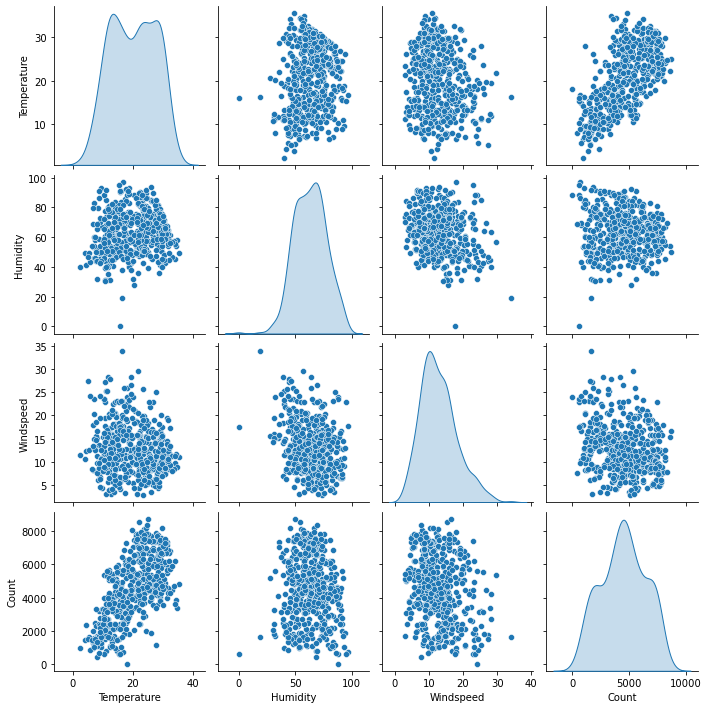

In [31]:
# Creating new dataframe only with numeric variables along with target variable

bike_num = df_train[['Temperature', 'Humidity', 'Windspeed', 'Count']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

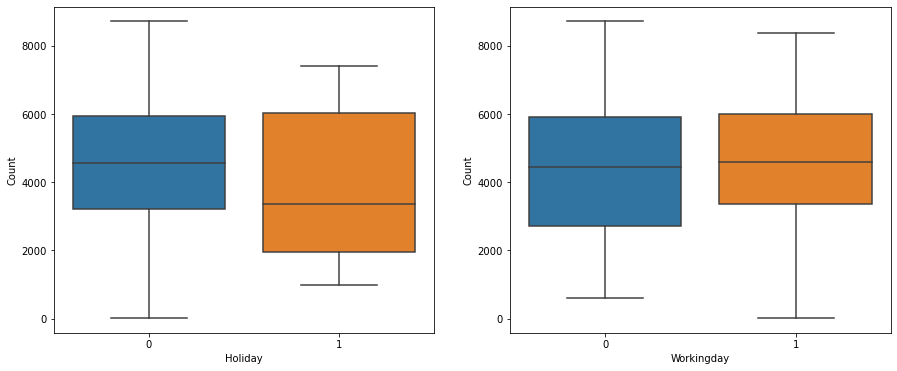

In [32]:
# Visualising Categorical Variables

plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.boxplot(x = 'Holiday', y = 'Count', data = bike)
plt.subplot(1,2,2)
sns.boxplot(x = 'Workingday', y = 'Count', data = bike)
plt.show()

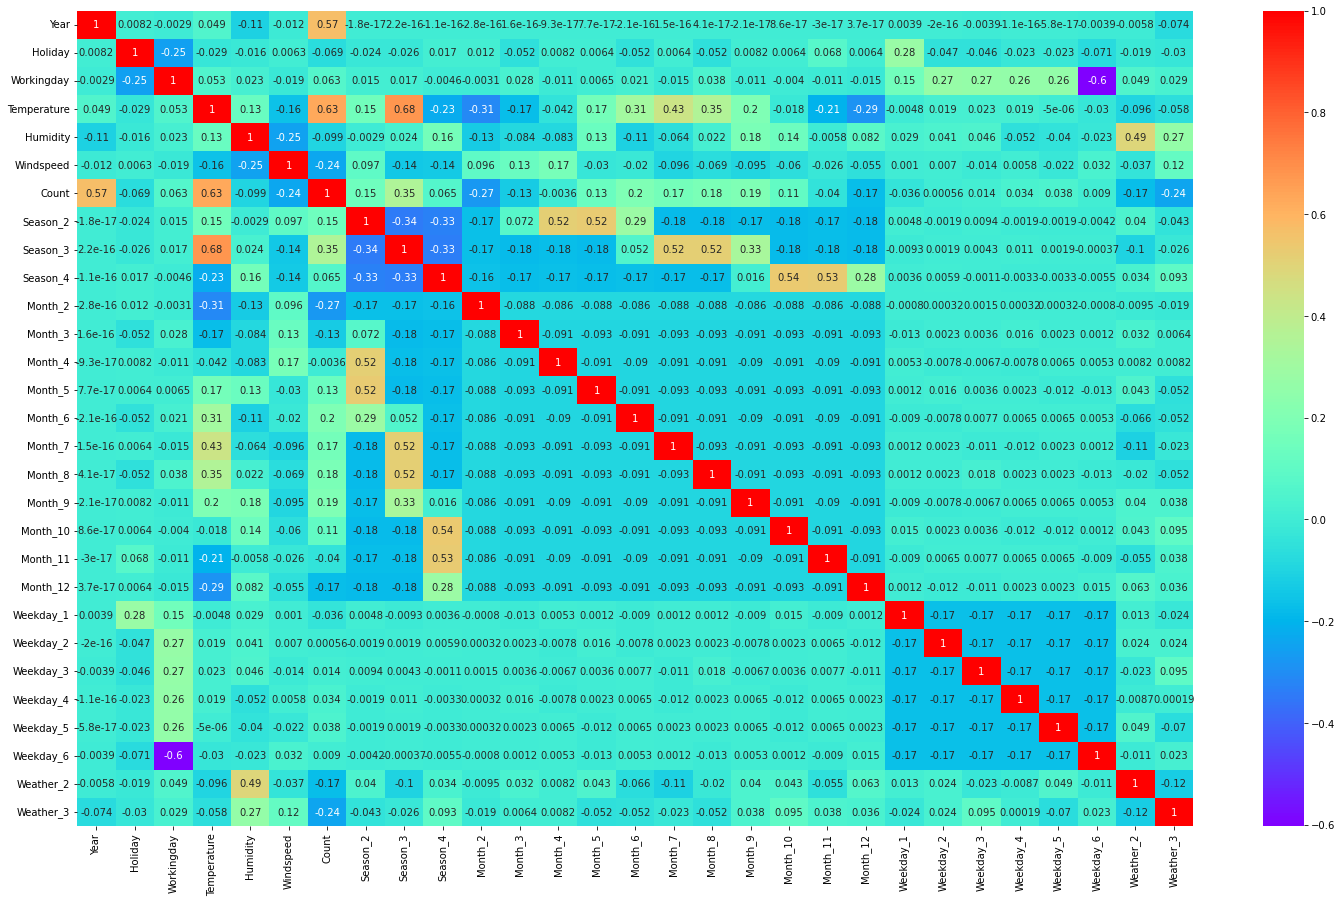

In [33]:
# Correlation Matrix

plt.figure(figsize = (25,15))
sns.heatmap(bike.corr(), annot = True, cmap = "rainbow")
plt.show()

### Rescaling the features

In [34]:
df_train.describe()

,Year,Holiday,Workingday,Temperature,Humidity,Windspeed,Count,Season_2,Season_3,Season_4,...,Month_11,Month_12,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Weather_2,Weather_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,63.123710,12.834912,4485.337255,0.247059,0.262745,0.247059,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,7.431626,14.153170,5.292031,1950.666077,0.431725,0.440557,0.431725,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df_train.columns

Index(['Year', 'Holiday', 'Workingday', 'Temperature', 'Humidity', 'Windspeed',
       'Count', 'Season_2', 'Season_3', 'Season_4', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Weekday_1', 'Weekday_2',
       'Weekday_3', 'Weekday_4', 'Weekday_5', 'Weekday_6', 'Weather_2',
       'Weather_3'],
      dtype='object')

In [36]:
# Rescaling only numeric variables

scaler = MinMaxScaler()
num_vars = ['Temperature', 'Humidity', 'Windspeed', 'Count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Year,Holiday,Workingday,Temperature,Humidity,Windspeed,Count,Season_2,Season_3,Season_4,...,Month_11,Month_12,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Weather_2,Weather_3
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [37]:
df_train.describe()

,Year,Holiday,Workingday,Temperature,Humidity,Windspeed,Count,Season_2,Season_3,Season_4,...,Month_11,Month_12,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Weather_2,Weather_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.247059,0.262745,0.247059,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.431725,0.440557,0.431725,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


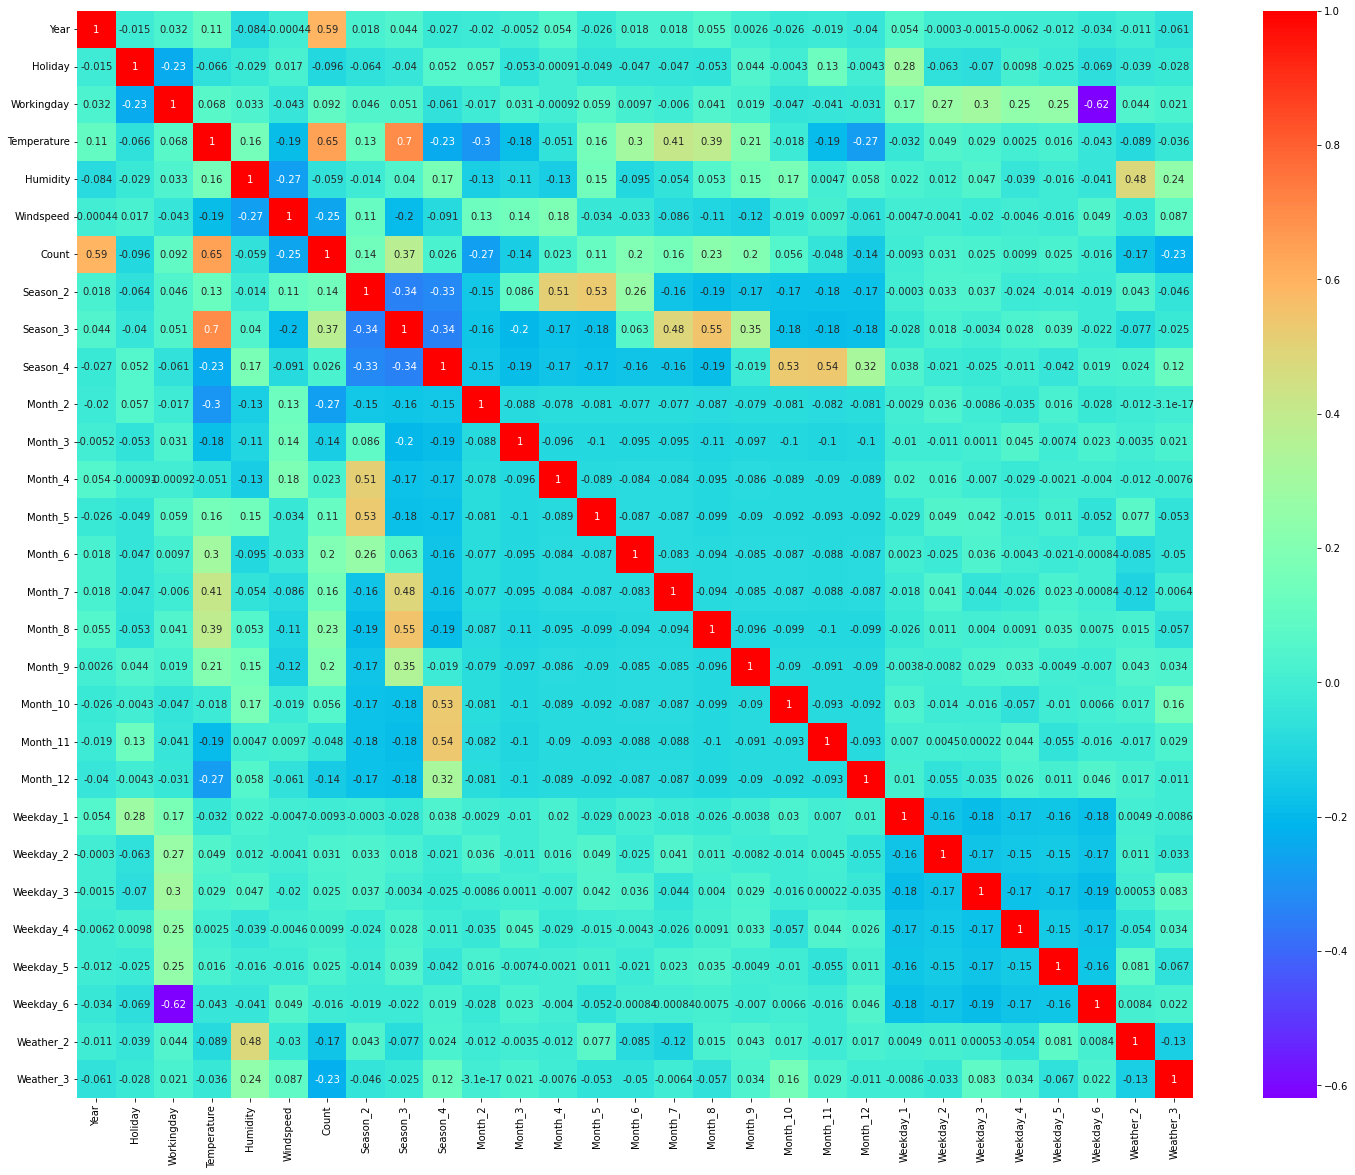

In [38]:
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap = "rainbow")
plt.show()

### Building a model

In [39]:
df_train.head()

,Year,Holiday,Workingday,Temperature,Humidity,Windspeed,Count,Season_2,Season_3,Season_4,...,Month_11,Month_12,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Weather_2,Weather_3
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [40]:
y_train = df_train.pop('Count')
X_train = df_train

### RFE 
- Selecting variables for model with RFE

In [41]:
lm = LinearRegression()

rfe = RFE(estimator=lm, n_features_to_select=15) 
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Holiday', True, 1),
 ('Workingday', True, 1),
 ('Temperature', True, 1),
 ('Humidity', True, 1),
 ('Windspeed', True, 1),
 ('Season_2', True, 1),
 ('Season_3', True, 1),
 ('Season_4', True, 1),
 ('Month_2', False, 6),
 ('Month_3', False, 2),
 ('Month_4', False, 4),
 ('Month_5', False, 3),
 ('Month_6', False, 5),
 ('Month_7', False, 7),
 ('Month_8', True, 1),
 ('Month_9', True, 1),
 ('Month_10', True, 1),
 ('Month_11', False, 8),
 ('Month_12', False, 9),
 ('Weekday_1', False, 10),
 ('Weekday_2', False, 11),
 ('Weekday_3', False, 13),
 ('Weekday_4', False, 14),
 ('Weekday_5', False, 12),
 ('Weekday_6', True, 1),
 ('Weather_2', True, 1),
 ('Weather_3', True, 1)]

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['Year', 'Holiday', 'Workingday', 'Temperature', 'Humidity', 'Windspeed',
       'Season_2', 'Season_3', 'Season_4', 'Month_8', 'Month_9', 'Month_10',
       'Weekday_6', 'Weather_2', 'Weather_3'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_11', 'Month_12', 'Weekday_1', 'Weekday_2', 'Weekday_3',
       'Weekday_4', 'Weekday_5'],
      dtype='object')

In [45]:
X_train_rfe = X_train[col]

### Model 01

In [46]:
X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_lm1).fit()


In [47]:
lr1.params

const          0.195221
Year           0.230148
Holiday       -0.054466
Workingday     0.044468
Temperature    0.497208
Humidity      -0.163900
Windspeed     -0.182540
Season_2       0.118324
Season_3       0.029169
Season_4       0.143004
Month_8        0.047286
Month_9        0.117613
Month_10       0.041624
Weekday_6      0.053083
Weather_2     -0.057693
Weather_3     -0.250689
dtype: float64

In [48]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          5.17e-191
Time:                        04:24:35   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1952      0.029      6.790      

### VIF

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Temperature,24.07
4,Humidity,17.44
7,Season_3,8.19
2,Workingday,5.05
5,Windspeed,3.88
6,Season_2,3.46
8,Season_4,2.85
13,Weather_2,2.15
0,Year,2.04
12,Weekday_6,1.91


In [50]:
X_train.head()

,Year,Holiday,Workingday,Temperature,Humidity,Windspeed,Season_2,Season_3,Season_4,Month_2,...,Month_11,Month_12,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Weather_2,Weather_3
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


### Model 02

Dropping Humidity instead of temperature to check decrease in VIF for temperature

In [51]:
X_train_new = X_train_rfe.drop(['Humidity'], axis = 1)

In [52]:
X_train_lm2 = sm.add_constant(X_train_new)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [53]:
lr2.params

const          0.100338
Year           0.234179
Holiday       -0.052426
Workingday     0.047540
Temperature    0.462685
Windspeed     -0.150168
Season_2       0.121620
Season_3       0.042523
Season_4       0.139015
Month_8        0.041739
Month_9        0.107852
Month_10       0.039099
Weekday_6      0.058080
Weather_2     -0.083773
Weather_3     -0.295653
dtype: float64

In [54]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.58e-188
Time:                        04:24:35   Log-Likelihood:                 509.66
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     495   BIC:                            -925.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1003      0.019      5.190      

### VIF

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Temperature,16.82
6,Season_3,7.78
2,Workingday,4.45
4,Windspeed,3.72
5,Season_2,3.42
7,Season_4,2.75
0,Year,2.04
8,Month_8,1.85
11,Weekday_6,1.78
10,Month_10,1.63


### Model 03
Dropping Season_3 due to high p-value and high VIF

In [56]:
X_train_new = X_train_new.drop(['Season_3'], axis = 1)

In [57]:
X_train_lm3 = sm.add_constant(X_train_new)

lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [58]:
lr3.params

const          0.093743
Year           0.233082
Holiday       -0.054099
Workingday     0.047315
Temperature    0.510620
Windspeed     -0.152990
Season_2       0.101899
Season_4       0.126666
Month_8        0.053932
Month_9        0.118514
Month_10       0.034306
Weekday_6      0.057825
Weather_2     -0.083999
Weather_3     -0.292947
dtype: float64

In [59]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.97e-188
Time:                        04:24:35   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0937      0.019      4.914      

### VIF

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Temperature,6.39
2,Workingday,4.40
4,Windspeed,3.60
0,Year,2.02
6,Season_4,2.00
5,Season_2,1.83
10,Weekday_6,1.77
9,Month_10,1.60
7,Month_8,1.59
11,Weather_2,1.55


### Model 04
Dropping Month_10 due to high p-value

In [61]:
X_train_new = X_train_new.drop(['Month_10'], axis = 1)

In [62]:
X_train_lm4 = sm.add_constant(X_train_new)

lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [63]:
lr4.params

const          0.090297
Year           0.232711
Holiday       -0.056011
Workingday     0.046317
Temperature    0.518828
Windspeed     -0.150835
Season_2       0.100362
Season_4       0.138202
Month_8        0.050952
Month_9        0.113626
Weekday_6      0.056927
Weather_2     -0.083049
Weather_3     -0.287225
dtype: float64

In [64]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          8.64e-189
Time:                        04:24:35   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0903      0.019      4.740      

### VIF

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Temperature,6.20
2,Workingday,4.35
4,Windspeed,3.60
0,Year,2.02
5,Season_2,1.82
9,Weekday_6,1.76
7,Month_8,1.58
10,Weather_2,1.54
6,Season_4,1.52
8,Month_9,1.31


### Model 05
Dropping Working day instead of temperature to check reduction of VIF for temperature

In [66]:
X_train_new = X_train_new.drop(['Workingday'], axis = 1)

In [67]:
X_train_lm5 = sm.add_constant(X_train_new)

lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [68]:
lr5.params

const          0.127605
Year           0.232977
Holiday       -0.093419
Temperature    0.518651
Windspeed     -0.151660
Season_2       0.101358
Season_4       0.136816
Month_8        0.053425
Month_9        0.115977
Weekday_6      0.018730
Weather_2     -0.081184
Weather_3     -0.282303
dtype: float64

In [69]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.10e-186
Time:                        04:24:36   Log-Likelihood:                 498.00
No. Observations:                 510   AIC:                            -972.0
Df Residuals:                     498   BIC:                            -921.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1276      0.017      7.614      

### VIF

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,5.03
3,Windspeed,3.17
0,Year,2.00
4,Season_2,1.82
6,Month_8,1.58
5,Season_4,1.49
9,Weather_2,1.49
7,Month_9,1.31
8,Weekday_6,1.18
10,Weather_3,1.08


### Model 06[Final Model]
Dropping Month_8 because all four variables before that plays an important role for the analysis.

In [71]:
X_train_new = X_train_new.drop(['Month_8'], axis = 1)

In [72]:
X_train_lm6 = sm.add_constant(X_train_new)

lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [73]:
lr6.params

const          0.122717
Year           0.233292
Holiday       -0.095340
Temperature    0.548963
Windspeed     -0.155247
Season_2       0.088411
Season_4       0.129164
Month_9        0.101074
Weekday_6      0.019681
Weather_2     -0.078460
Weather_3     -0.283329
dtype: float64

In [74]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.11e-185
Time:                        04:24:36   Log-Likelihood:                 492.77
No. Observations:                 510   AIC:                            -963.5
Df Residuals:                     499   BIC:                            -917.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1227      0.017      7.286      

### VIF

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,3.70
3,Windspeed,3.12
0,Year,2.00
4,Season_2,1.57
8,Weather_2,1.48
5,Season_4,1.38
6,Month_9,1.20
7,Weekday_6,1.18
9,Weather_3,1.08
1,Holiday,1.04


In this Model 06 we got all the parameters optimised and no feature is having VIF more than 5 and p-value more than 0.05. So lets fix with this model and lets do further analysis.

### Residual Analysis
- Verifying whether the error terms are normally distributed

In [76]:
y_train_pred = lr6.predict(X_train_lm6)
y_train_pred

576    0.762415
426    0.500446
728    0.387615
482    0.573587
111    0.263368
         ...   
578    0.801245
53     0.216656
350    0.262326
79     0.304392
520    0.639635
Length: 510, dtype: float64

In [77]:
res = y_train-y_train_pred

Text(0.5, 1.0, 'Residual Plot')

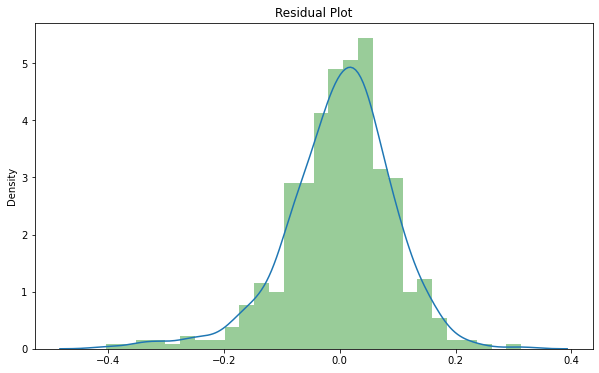

In [78]:
plt.figure(figsize=(10,6))
sns.distplot(res, hist_kws={'color':'green', 'lw':5})
plt.title('Residual Plot')

There is No Multicollinearity between the predictor variables

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,3.70
3,Windspeed,3.12
0,Year,2.00
4,Season_2,1.57
8,Weather_2,1.48
5,Season_4,1.38
6,Month_9,1.20
7,Weekday_6,1.18
9,Weather_3,1.08
1,Holiday,1.04


### Predictions and evaluation on test data set

Rescaling the test set

In [80]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Year,Holiday,Workingday,Temperature,Humidity,Windspeed,Count,Season_2,Season_3,Season_4,...,Month_11,Month_12,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Weather_2,Weather_3
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
df_test.describe()

,Year,Holiday,Workingday,Temperature,Humidity,Windspeed,Count,Season_2,Season_3,Season_4,...,Month_11,Month_12,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Weather_2,Weather_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
y_test = df_test.pop("Count")
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         220 non-null    int64  
 1   Holiday      220 non-null    int64  
 2   Workingday   220 non-null    int64  
 3   Temperature  220 non-null    float64
 4   Humidity     220 non-null    float64
 5   Windspeed    220 non-null    float64
 6   Season_2     220 non-null    uint8  
 7   Season_3     220 non-null    uint8  
 8   Season_4     220 non-null    uint8  
 9   Month_2      220 non-null    uint8  
 10  Month_3      220 non-null    uint8  
 11  Month_4      220 non-null    uint8  
 12  Month_5      220 non-null    uint8  
 13  Month_6      220 non-null    uint8  
 14  Month_7      220 non-null    uint8  
 15  Month_8      220 non-null    uint8  
 16  Month_9      220 non-null    uint8  
 17  Month_10     220 non-null    uint8  
 18  Month_11     220 non-null    uint8  
 19  Month_

In [83]:
# Selecting the variables that were part of our final model.

col1 = X_train_new.columns
X_test = X_test[col1]

In [84]:
# Adding constant variable to test dataframe

X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   const        220 non-null    float64
 1   Year         220 non-null    int64  
 2   Holiday      220 non-null    int64  
 3   Temperature  220 non-null    float64
 4   Windspeed    220 non-null    float64
 5   Season_2     220 non-null    uint8  
 6   Season_4     220 non-null    uint8  
 7   Month_9      220 non-null    uint8  
 8   Weekday_6    220 non-null    uint8  
 9   Weather_2    220 non-null    uint8  
 10  Weather_3    220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [85]:
# Making predictions using the final model (lr6)

y_test_pred = lr6.predict(X_test_lm6)

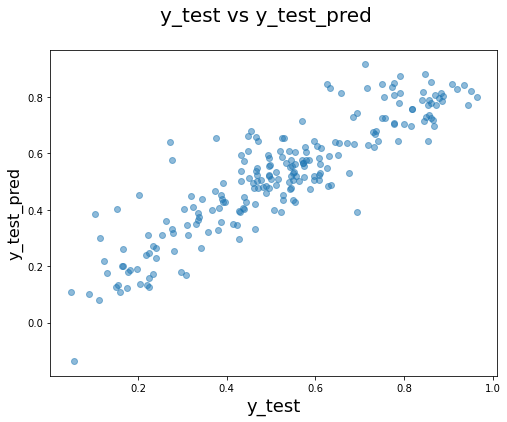

In [86]:
fig = plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)            
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

### R^2Score

In [87]:
r2_score(y_true = y_train, y_pred = y_train_pred)

0.831343023531739

In [88]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.7949096840016242

Model prediction on the test data set is quite good as that of train data set. So we can conclude with this model.

### Adjusted R^2 Value for TEST

In [89]:
X_test.shape

(220, 10)

In [90]:
r2 = 0.79490968400162422

In [91]:
n = X_test.shape[0]

p = X_test.shape[1]

In [92]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2 

0.7850967502217976

### Final Report

Below is the model with y-intercept and co-efficient.

Count = 0.123(const)+ 0.233(Year)+ 0.549(Temperature)+ 0.088(Season_2)+ 0.129(Season_4)+ 0.101(Month_9)+ 0.020(Weekday_6)-
0.095(Holiday)- 0.155(Windspeed)- 0.079(Weather_2)- 0.283(Weather_3)

- Train R^2          :0.831
- Train Adjusted R^2 :0.828
- Test R^2           :0.795
- Test Adjusted R^2  :0.785
- This seems to be a really good model that can very well 'Generalize' various datasets.